In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [4]:
irx = wb.DataReader('irx', data_source='yahoo', start=datetime(2006,12,4))
dxy = wb.DataReader('dxy', data_source='yahoo', start=datetime(2006,12,4))

RemoteDataError: Unable to read URL: http://ichart.finance.yahoo.com/table.csv

In [51]:
data = pd.DataFrame({'dia':dia['Adj Close'], 'spy':spy['Adj Close']})

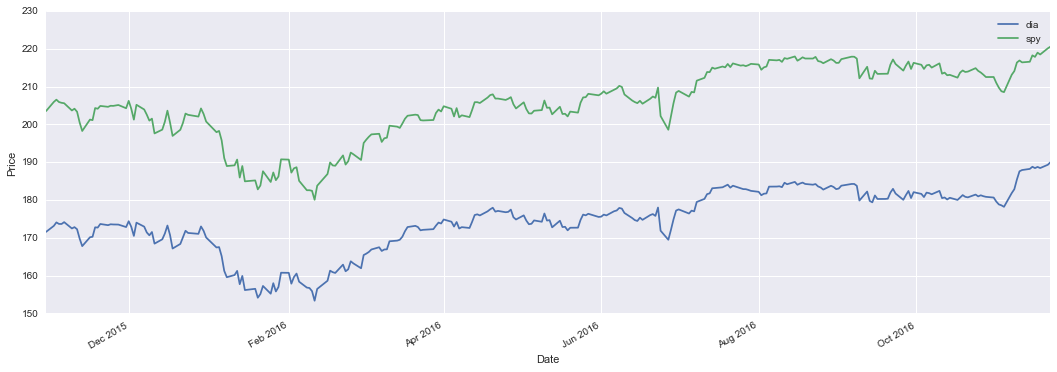

In [52]:
# Graph two stocks' adj close prices
d = dia['Adj Close']
s = spy['Adj Close']
d.plot(figsize = (18,6))
s.plot(figsize = (18,6));
plt.ylabel('Price')
plt.legend(['dia', 'spy']);

### Correlation Calculation

In [53]:
# Calculate the correlation between SPY and DIA
d.corr(s)

0.99175203559011083

In [54]:
s.corr(d)

0.99175203559011083

### Cointegration Calculation and Testing
http://stackoverflow.com/questions/11362943/efficient-cointegration-test-in-python

In [55]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

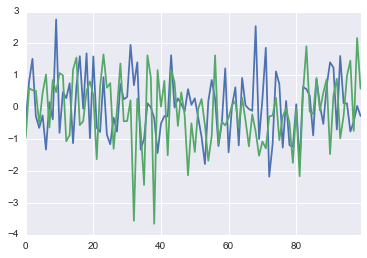

In [56]:
# Let's first see a random cointegration pair set-up here as a contrast to the later conintegration result of our pair DIA/SPY later.
# Turns out based on the cointegration test result below, this random pair is not cointegrated with each other.
y = np.random.normal(0,1, 100)
x = np.random.normal(0,1, 100)

ydt = pd.Series(y)
xdt = pd.Series(x)

xdt.plot()
ydt.plot();

In [57]:
# Define the function of running the cointegration and test the result

def cointegration_test(ydt, xdt):
    # Step 1: regress on variable on the other 
    ols_result = sm.OLS(ydt, xdt).fit() 
    # Step 2: obtain the residual (ols_resuld.resid)
    # Step 3: apply Augmented Dickey-Fuller test to see whether 
    #        the residual is unit root    
    return ts.adfuller(ols_result.resid)

cointegration_test(ydt, xdt)

(-4.6137769915572981,
 0.00012182409898869153,
 2,
 97,
 {'1%': -3.4996365338407074,
  '10%': -2.5829283377617176,
  '5%': -2.8918307730370025},
 265.69234552060618)

In [58]:
# Test the cointegration for the real pair in this notebook - DIA and SPY

def cointegration_test(d, s):
    # Step 1: regress on variable on the other 
    ols_result = sm.OLS(d, s).fit() 
    # Step 2: obtain the residual (ols_resuld.resid)
    # Step 3: apply Augmented Dickey-Fuller test to see whether 
    #        the residual is unit root    
    return ts.adfuller(ols_result.resid)

cointegration_test(d, s)

(-2.3520908746317932,
 0.1557172564007212,
 3,
 265,
 {'1%': -3.4552699038400827,
  '10%': -2.5726152830188678,
  '5%': -2.8725092359464526},
 150.47768351855001)

#### How to interpret the cointegration test result shown above?
For example, for the output result above, if '1%' value is less than the smaller one of the first two numbers, which are -2.3520908746317932 and 0.1557172564007212, then we say we have a 99% of confidence that DIA and SPY are cointegrated with each other.

http://quant.stackexchange.com/questions/2076/how-to-interpret-the-eigenmatrix-from-a-johansen-cointegration-test